<a href="https://colab.research.google.com/github/Vincent-SS/sig-worldwide-traders/blob/main/etf_dual_mving_avg_algothon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Description: This program uses the dual moving average crossover to determine when to buy and sell stock/ETF

In [2]:
# Import the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Load & Store the data
url = 'https://query1.finance.yahoo.com/v7/finance/download/SPY?period1=1483228800&period2=1601424000&interval=1d&events=history&includeAdjustedClose=true'
ETF = pd.read_csv(url)
ETF

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,225.039993,225.830002,223.880005,225.240005,209.785889,91366500
1,2017-01-04,225.619995,226.750000,225.610001,226.580002,211.033981,78744400
2,2017-01-05,226.270004,226.580002,225.479996,226.399994,210.866318,78379000
3,2017-01-06,226.529999,227.750000,225.899994,227.210007,211.620728,71559900
4,2017-01-09,226.910004,227.070007,226.419998,226.460007,210.922211,46939700
...,...,...,...,...,...,...,...
937,2020-09-23,330.899994,331.200012,322.100006,322.640015,322.640015,93112200
938,2020-09-24,321.220001,326.799988,319.799988,323.500000,323.500000,76681300
939,2020-09-25,322.579987,329.579987,321.640015,328.730011,328.730011,71069400
940,2020-09-28,333.220001,334.959991,332.149994,334.190002,334.190002,64584600


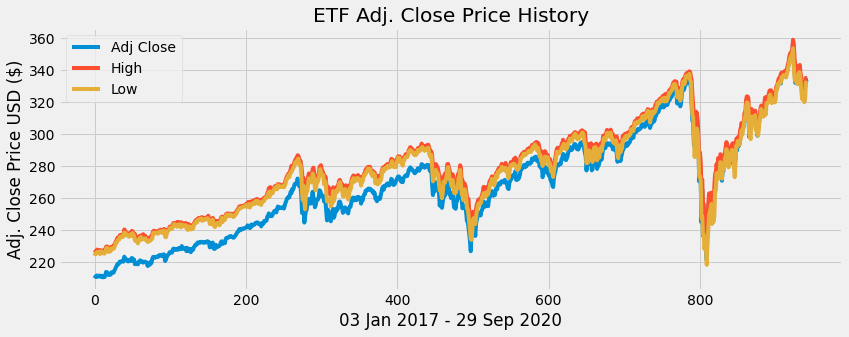

In [4]:
# Visualize the data
plt.figure(figsize=(12.5, 4.5))
plt.plot(ETF['Adj Close'], label = 'Adj Close')
plt.plot(ETF['High'], label = 'High')
plt.plot(ETF['Low'], label = 'Low')
plt.title('ETF Adj. Close Price History')
plt.xlabel('03 Jan 2017 - 29 Sep 2020')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [5]:
# Calculate the typical price ( TP, formula: TP = (H+L+C)/3 )
TP = pd.DataFrame()
TP['Typical Price'] = (ETF['High'] + ETF['Low'] + ETF['Adj Close']) / 3
TP

,Typical Price
0,219.831965
1,221.131327
2,220.975439
3,221.756907
4,221.470739
...,...
937,325.313344
938,323.366659
939,326.650004
940,333.766662


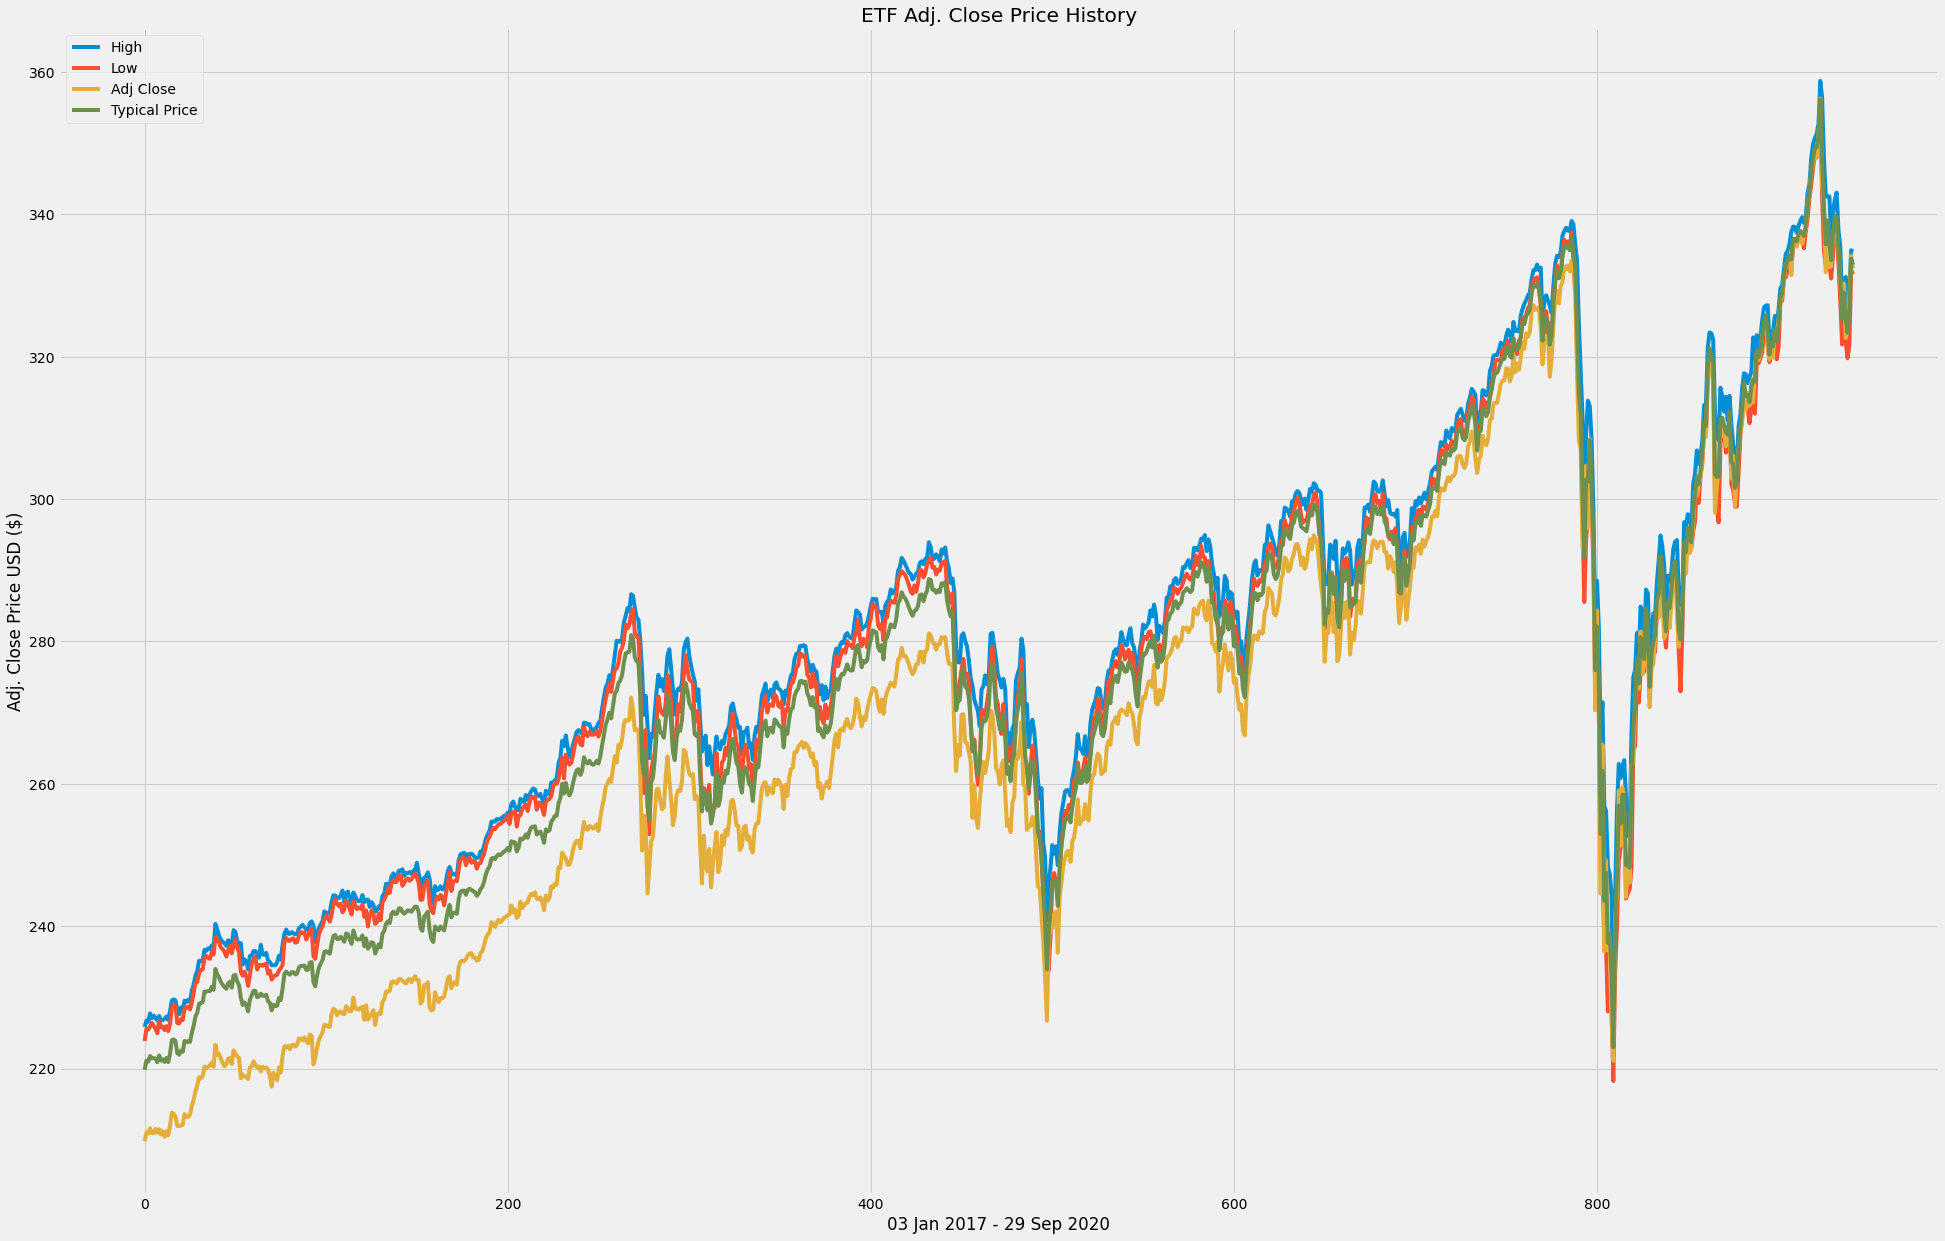

In [6]:
# Visualize the data (with Typical Price)
plt.figure(figsize=(30, 20))
plt.plot(ETF['High'], label = 'High')
plt.plot(ETF['Low'], label = 'Low')
plt.plot(ETF['Adj Close'], label = 'Adj Close')
plt.plot(TP['Typical Price'], label = 'Typical Price')
plt.title('ETF Adj. Close Price History')
plt.xlabel('03 Jan 2017 - 29 Sep 2020')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [46]:
# Calculate VWAP (formula: VWAP = cumulative TP / cumulative volume)
# NOTE THIS PART NOT WORK
VWAP = pd.DataFrame()

'''
# TEST CUMSUM
a = np.array([1,2,3,4,5])
b = np.cumsum(a[-3:])
b[-1]
'''

#VWAP['VWAP-10days'] = np.cumsum(TP['Typical Price'][-50:]) / np.cumsum(ETF['Volume'][-50:])
#VWAP

for i in range(49, len(TP['Typical Price'])):
  VWAP['VWAP'] = np.cumsum(TP['Typical Price'][-50:i]) / np.cumsum(ETF['Volume'][-50:i])


,VWAP
892,0.000006


In [8]:
# Create the simple moving average with a 30 day window
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = ETF['Adj Close'].rolling(window = 30).mean()
SMA30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
937,338.438113
938,338.018292
939,337.793058
940,337.749491


In [9]:
# Create a simple moving 100 day average
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = ETF['Adj Close'].rolling(window = 100).mean()
SMA100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
937,317.649380
938,318.072360
939,318.521659
940,319.044797


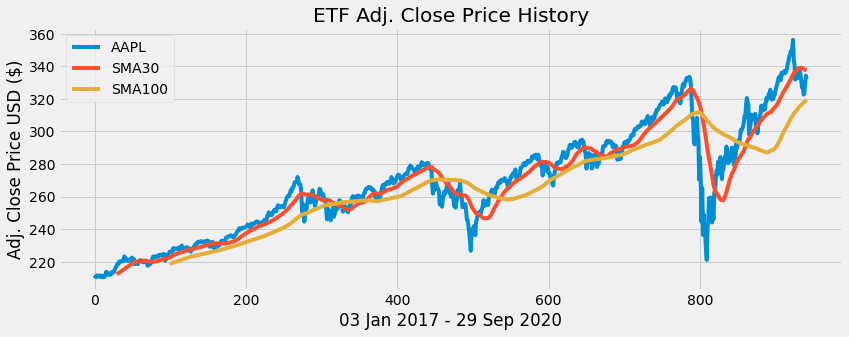

In [10]:
# Visualize the data (with SMA30 & SMA100)
plt.figure(figsize=(12.5, 4.5))
plt.plot(ETF['Adj Close'], label = 'AAPL')
plt.plot(SMA30['Adj Close'], label = 'SMA30')
plt.plot(SMA100['Adj Close'], label = 'SMA100')
plt.title('ETF Adj. Close Price History')
plt.xlabel('03 Jan 2017 - 29 Sep 2020')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [11]:
# Create a new data frame to store all the data
data = pd.DataFrame()
data['ETF'] = ETF['Adj Close']
data['SMA30'] = SMA30['Adj Close']
data['SMA100'] = SMA100['Adj Close']
data

,ETF,SMA30,SMA100
0,209.785889,NaN,NaN
1,211.033981,NaN,NaN
2,210.866318,NaN,NaN
3,211.620728,NaN,NaN
4,210.922211,NaN,NaN
...,...,...,...
937,322.640015,338.438113,317.649380
938,323.500000,338.018292,318.072360
939,328.730011,337.793058,318.521659
940,334.190002,337.749491,319.044797


In [12]:
# Create a funciton to signal when to buy and sell the asset/stock/ETF
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1

    for i in range(len(data)):
        if data['SMA30'][i] > data['SMA100'][i]:
            if flag != 1:
                sigPriceBuy.append(data['ETF'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA30'][i] < data['SMA100'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['ETF'][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    return (sigPriceBuy, sigPriceSell)

In [13]:
# Store the buy and sell data into a variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [14]:
# Show the data
data

,ETF,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,209.785889,NaN,NaN,NaN,NaN
1,211.033981,NaN,NaN,NaN,NaN
2,210.866318,NaN,NaN,NaN,NaN
3,211.620728,NaN,NaN,NaN,NaN
4,210.922211,NaN,NaN,NaN,NaN
...,...,...,...,...,...
937,322.640015,338.438113,317.649380,NaN,NaN
938,323.500000,338.018292,318.072360,NaN,NaN
939,328.730011,337.793058,318.521659,NaN,NaN
940,334.190002,337.749491,319.044797,NaN,NaN


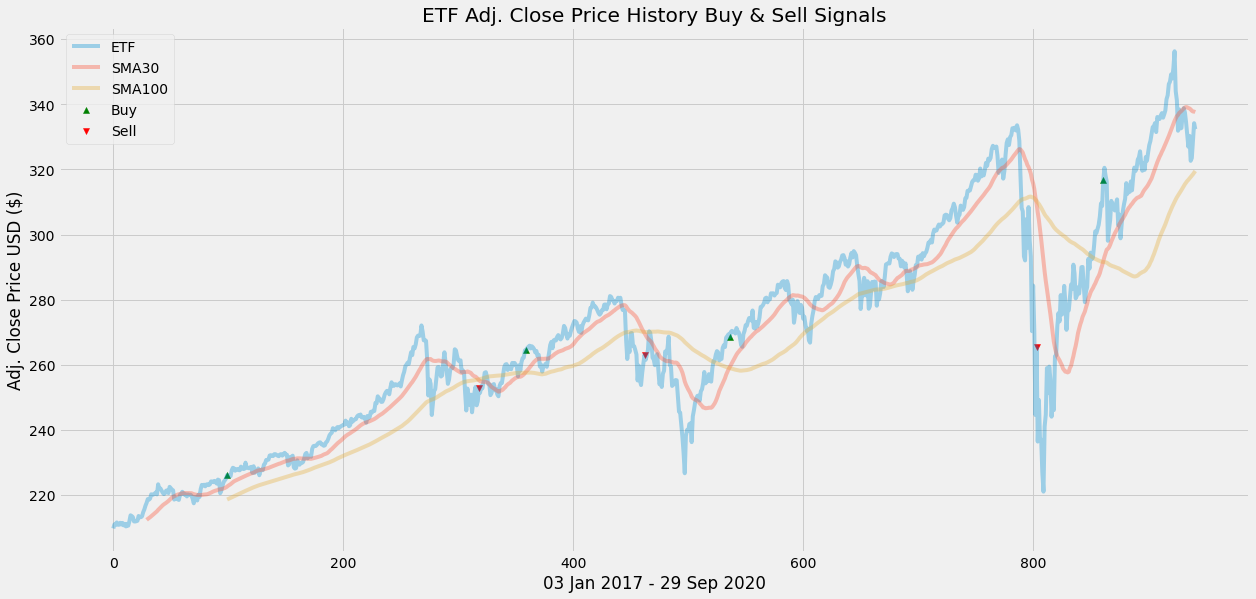

In [15]:
# Visualize the data and the strategy to buy and sell the stock/ETF
plt.figure(figsize=(19, 9))
plt.plot(data['ETF'], label = 'ETF', alpha = 0.35)
plt.plot(data['SMA30'], label = 'SMA30', alpha = 0.35)
plt.plot(data['SMA100'], label = 'SMA100', alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('ETF Adj. Close Price History Buy & Sell Signals')
plt.xlabel('03 Jan 2017 - 29 Sep 2020')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc = 'upper left')
plt.show()